<a href="https://colab.research.google.com/github/rohitkhadka1/AI-ML-DS/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
#Feature Selection for Ridge Regression using RFE
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
df = pd.read_csv("GHI.csv")
df.head()

,Rank,Country,2000,2008,2015,2023,Absolute change since 2015,% change since 2015
0,1,Belarus,<5,<5,<5,<5,—,—
1,1,Bosnia & Herzegovina,9.4,6.5,5.3,<5,—,—
2,1,Chile,<5,<5,<5,<5,—,—
3,1,China,13.4,7.1,<5,<5,—,—
4,1,Croatia,<5,<5,<5,<5,—,—


In [ ]:
df.describe()

,Rank
count,125.000000
mean,61.376000
std,38.474052
min,1.000000
25%,32.000000
50%,62.000000
75%,94.000000
max,125.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Rank                        125 non-null    int64 
 1   Country                     125 non-null    object
 2   2000                        125 non-null    object
 3   2008                        125 non-null    object
 4   2015                        125 non-null    object
 5   2023                        125 non-null    object
 6   Absolute change since 2015  121 non-null    object
 7   % change since 2015         121 non-null    object
dtypes: int64(1), object(7)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

Rank                          0
Country                       0
2000                          0
2008                          0
2015                          0
2023                          0
Absolute change since 2015    4
% change since 2015           4
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

Rank                          0
Country                       0
2000                          0
2008                          0
2015                          0
2023                          0
Absolute change since 2015    0
% change since 2015           0
dtype: int64

In [ ]:
df.head()

,Rank,Country,2000,2008,2015,2023,Absolute change since 2015,% change since 2015
0,1,Belarus,<5,<5,<5,<5,—,—
1,1,Bosnia & Herzegovina,9.4,6.5,5.3,<5,—,—
2,1,Chile,<5,<5,<5,<5,—,—
3,1,China,13.4,7.1,<5,<5,—,—
4,1,Croatia,<5,<5,<5,<5,—,—


In [ ]:
countryGroupedByRank= df.groupby("Rank")["Country"].apply(list).reset_index()
countryGroupedByRank

,Rank,Country
0,1,"[Belarus, Bosnia & Herzegovina, Chile, China, ..."
1,21,[Uzbekistan]
2,22,[Costa Rica]
3,23,[Bulgaria]
4,24,[Kazakhstan]
...,...,...
87,121,[Lesotho]
88,122,[Dem. Rep. of the Congo]
89,123,[Yemen]
90,124,[Madagascar]


In [ ]:
df[["Absolute change since 2015",	"% change since 2015"]].sample(n =20)

,Absolute change since 2015,% change since 2015
9,—,—
87,-1.8,-7.9
121,-0.7,-1.9
40,0,0
95,-2.9,-10.2
117,-0.3,-0.9
69,-3,-16.7
108,0.5,1.8
21,—,—
18,—,—


In [ ]:
df['2000'] = pd.to_numeric(df['2000'], errors='coerce')
df['2008'] = pd.to_numeric(df['2008'], errors='coerce')
df['2015'] = pd.to_numeric(df['2015'], errors='coerce')
df['2023'] = pd.to_numeric(df['2023'], errors='coerce')
df["Absolute change since 2015"] = pd.to_numeric(df["Absolute change since 2015"], errors='coerce')
df["% change since 2015"] = pd.to_numeric(df["% change since 2015"], errors='coerce')

In [ ]:
describe = df.describe()
describe

,Rank,2000,2008,2015,2023,Absolute change since 2015,% change since 2015
count,121.000000,110.000000,113.000000,107.000000,102.000000,101.000000,101.000000
mean,61.314050,26.550909,21.248673,18.700935,17.879412,-1.489109,-7.676238
std,38.474674,14.362213,11.956873,10.235118,9.727224,2.107695,11.341156
min,1.000000,6.700000,5.100000,5.000000,5.000000,-7.200000,-30.700000
25%,32.000000,14.700000,11.000000,9.100000,8.700000,-2.400000,-16.400000
50%,62.000000,24.450000,18.800000,18.000000,16.100000,-1.400000,-7.600000
75%,94.000000,38.200000,30.400000,26.800000,25.825000,-0.200000,-1.100000
max,125.000000,64.900000,49.900000,44.000000,42.300000,4.900000,24.100000


In [ ]:
min_values = [describe['2000'][3], describe['2008'][3],  describe['2015'][3], describe['2023'][3] ]

C:\Users\Asus\AppData\Local\Temp\ipykernel_1332\2801274959.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_values = [describe['2000'][3], describe['2008'][3],  describe['2015'][3], describe['2023'][3] ]


In [ ]:
print(df.head())
years = ['2000', '2008', '2015', '2023']

   Rank               Country  2000  2008  2015  2023  \
0     1               Belarus   NaN   NaN   NaN   NaN   
1     1  Bosnia & Herzegovina   9.4   6.5   5.3   NaN   
2     1                 Chile   NaN   NaN   NaN   NaN   
3     1                 China  13.4   7.1   NaN   NaN   
4     1               Croatia   NaN   NaN   NaN   NaN   

   Absolute change since 2015  % change since 2015  
0                         NaN                  NaN  
1                         NaN                  NaN  
2                         NaN                  NaN  
3                         NaN                  NaN  
4                         NaN                  NaN  


Since the new nan values in the years are due to forceful conversion to numeric type, so we will replace them with the min values of the particular year.

In [ ]:
for i, year in enumerate(years):
     df[year].replace(np.nan, min_values[i], inplace= True )

C:\Users\Asus\AppData\Local\Temp\ipykernel_1332\2592673323.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[year].replace(np.nan, min_values[i], inplace= True )


In [ ]:
df.head()

,Rank,Country,2000,2008,2015,2023,Absolute change since 2015,% change since 2015
0,1,Belarus,6.7,5.1,5.0,5.0,NaN,NaN
1,1,Bosnia & Herzegovina,9.4,6.5,5.3,5.0,NaN,NaN
2,1,Chile,6.7,5.1,5.0,5.0,NaN,NaN
3,1,China,13.4,7.1,5.0,5.0,NaN,NaN
4,1,Croatia,6.7,5.1,5.0,5.0,NaN,NaN


In [ ]:
df["Absolute change since 2015"] = np.abs((df['2023'] - df['2015']).values)
df['% change since 2015'] = (df['Absolute change since 2015'] / df ['2015']) * 100
df.head()

,Rank,Country,2000,2008,2015,2023,Absolute change since 2015,% change since 2015
0,1,Belarus,6.7,5.1,5.0,5.0,0.0,0.000000
1,1,Bosnia & Herzegovina,9.4,6.5,5.3,5.0,0.3,5.660377
2,1,Chile,6.7,5.1,5.0,5.0,0.0,0.000000
3,1,China,13.4,7.1,5.0,5.0,0.0,0.000000
4,1,Croatia,6.7,5.1,5.0,5.0,0.0,0.000000


In [ ]:
# sns.pairplot(df)

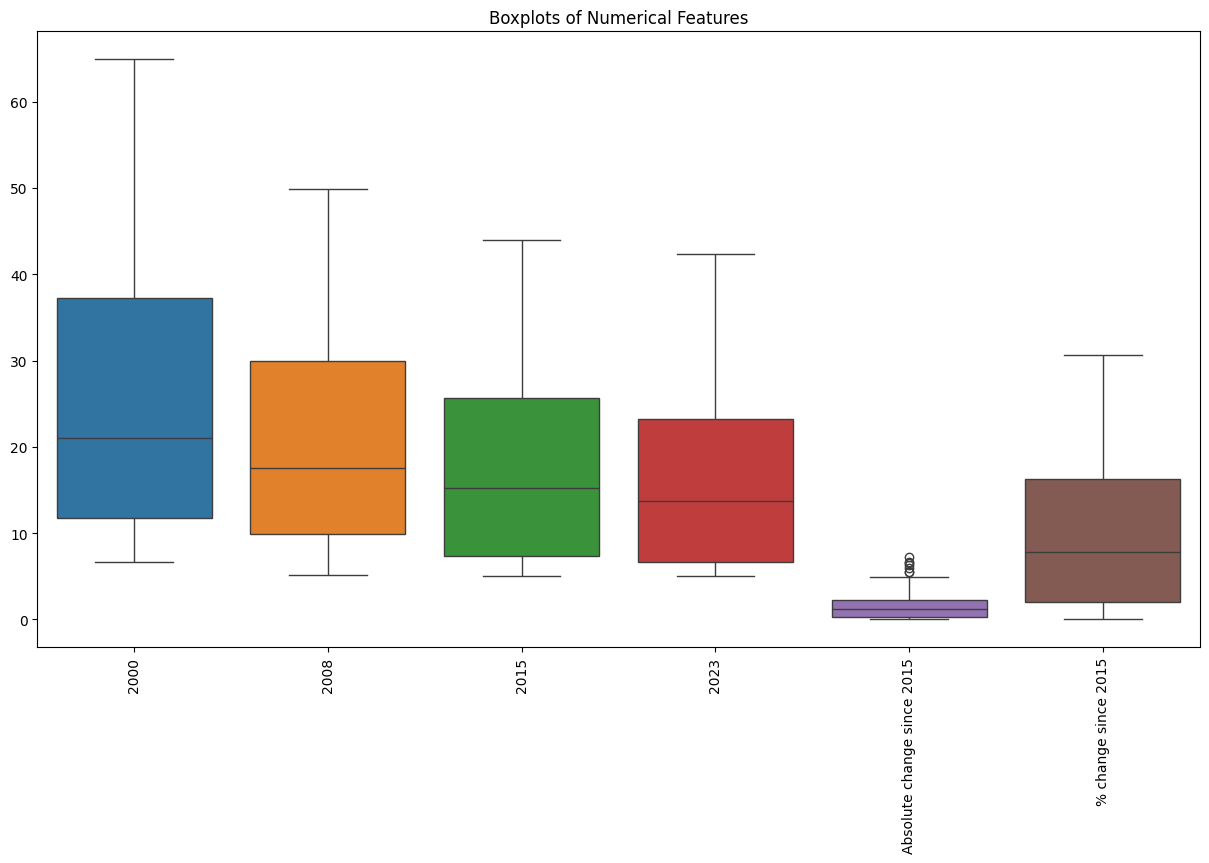

In [ ]:
#checking for outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.select_dtypes(include=['float64']))
plt.xticks(rotation=90)  # Rotate labels for readability
plt.title("Boxplots of Numerical Features")
plt.show()

Since outliers are in the absolute change since 2015 and % change since 2015 columns, I will not clip or remove them.

In [ ]:
#Feature engineering
df["Absolute change between 2008 and 2000"] = np.abs(df['2008'] - df['2000']).values
df["Absolute change between 2015 and 2008"] = np.abs(df['2015'] - df['2008']).values
df


,Rank,Country,2000,2008,2015,2023,Absolute change since 2015,% change since 2015,Absolute change between 2008 and 2000,Absolute change between 2015 and 2008
0,1,Belarus,6.7,5.1,5.0,5.0,0.0,0.000000,1.6,0.1
1,1,Bosnia & Herzegovina,9.4,6.5,5.3,5.0,0.3,5.660377,2.9,1.2
2,1,Chile,6.7,5.1,5.0,5.0,0.0,0.000000,1.6,0.1
3,1,China,13.4,7.1,5.0,5.0,0.0,0.000000,6.3,2.1
4,1,Croatia,6.7,5.1,5.0,5.0,0.0,0.000000,1.6,0.1
...,...,...,...,...,...,...,...,...,...,...
120,121,Lesotho,32.5,27.8,30.6,35.5,4.9,16.013072,4.7,2.8
121,122,Dem. Rep. of the Congo,46.3,40.2,36.4,35.7,0.7,1.923077,6.1,3.8
122,123,Yemen,41.4,37.8,42.1,39.9,2.2,5.225653,3.6,4.3
123,124,Madagascar,42.4,36.6,38.9,41.0,2.1,5.398458,5.8,2.3


In [ ]:
#Splitting the dataframe into feature matrix and label vector
X = df.drop(columns = ['Country', '2023'])
y = df['2023']

In [ ]:
X.head()

,Rank,2000,2008,2015,Absolute change since 2015,% change since 2015,Absolute change between 2008 and 2000,Absolute change between 2015 and 2008
0,1,6.7,5.1,5.0,0.0,0.000000,1.6,0.1
1,1,9.4,6.5,5.3,0.3,5.660377,2.9,1.2
2,1,6.7,5.1,5.0,0.0,0.000000,1.6,0.1
3,1,13.4,7.1,5.0,0.0,0.000000,6.3,2.1
4,1,6.7,5.1,5.0,0.0,0.000000,1.6,0.1


In [ ]:
def train_test_split(X, y, test_size = 0.3, random_seed = 42):
    """
    Splits dataset into train and test sets.
    Arguments:
    X : np.ndarray
    Feature matrix.
    y : np.ndarray
    Target array.
    test_size : float
    Proportion of the dataset to include in the test split (0 < test_size < 1).
    random_seed : int
    Seed for reproducibility.
    Returns:
    X_train, X_test, y_train, y_test : np.ndarray
    Training and testing splits of features and target.
    """
    np.random.seed(random_seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]

    return X_train, X_test, y_train, y_test
#Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size= 0.3, random_seed= 42)


In [ ]:
#Converting the X_train, X_test back to dataframes
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)
X_train

,Rank,2000,2008,2015,Absolute change since 2015,% change since 2015,Absolute change between 2008 and 2000,Absolute change between 2015 and 2008
0,32.0,11.7,6.8,5.4,1.3,24.074074,4.9,1.4
1,55.0,15.7,12.4,14.6,2.2,15.068493,3.3,2.2
2,124.0,42.4,36.6,38.9,2.1,5.398458,5.8,2.3
3,1.0,6.7,5.1,5.0,0.0,0.000000,1.6,0.1
4,35.0,11.0,10.2,7.5,0.5,6.666667,0.8,2.7
...,...,...,...,...,...,...,...,...
80,111.0,38.4,35.5,29.2,0.5,1.712329,2.9,6.3
81,1.0,6.7,5.8,5.0,0.0,0.000000,0.9,0.8
82,96.0,49.7,33.1,28.3,2.9,10.247350,16.6,4.8
83,53.0,11.0,10.7,10.7,0.1,0.934579,0.3,0.0


In [ ]:
for col in X_train.columns:
    X_min = X_train[col].min()
    X_max = X_train[col].max()

    X_train[col] = (X_train[col] - X_min) / (X_max - X_min)
    X_test[col] = (X_test[col] - X_min) / (X_max - X_min)  # Use X_train's min/max


In [ ]:
#Linear Regression from scratch
class LinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.theta = np.zeros(self.n)
        self.bias = 0
        self.X = X
        self.y = y

        for _ in range(self.iterations):
            self.update_weights()

    def update_weights(self):
        y_pred = self.predict(self.X)
        d_theta = -(2 / self.m) * np.dot(self.X.T, (self.y - y_pred))
        d_bias = -(2 / self.m) * np.sum(self.y - y_pred)

        self.theta -= self.learning_rate * d_theta
        self.bias -= self.learning_rate * d_bias

    def predict(self, X):
        return np.dot(X, self.theta) + self.bias

In [ ]:
#Implementation of Linear Regression from Scratch
LR = LinearRegression()
LR.fit(X_train.values, y_train)
y_scratch_prediction = LR.predict(X_test)

In [ ]:
y_scratch_prediction

array([10.56825229, 10.17180794,  3.9010528 , 13.00774798,  6.71705275,
       15.39129157, 19.08074435,  3.96666504,  9.98291687, 30.23720071,
        3.99833855, 15.08883377,  3.91688955,  7.64015839, 24.62469079,
       34.00827483, 30.163101  ,  3.9010528 , 24.88453463, 27.62279971,
       17.62009856, 11.34530248,  6.99641836, 20.0221509 ,  7.53012906,
        3.31038925,  2.57349881, 33.31406161, 17.77751665, 26.30016561,
        6.09761773, 20.19689456,  7.21268438, 28.973779  , 14.07452577,
       32.96771946])

In [ ]:
#r2 score for scratch model
r2_scratch = r2_score(y_test, y_scratch_prediction)
r2_scratch

0.9679690014380422

In [ ]:
#mean squared error
mse_scratch = mean_squared_error(y_test, y_scratch_prediction)
mse_scratch

3.2797785077532655

In [ ]:
# Ridge Regression with GridSearchCV
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

# Decision Tree Regressor with GridSearchCV
dt_params = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
dt = DecisionTreeRegressor(random_state=42)
dt_cv = GridSearchCV(dt, dt_params, cv=5, scoring='neg_mean_squared_error')
dt_cv.fit(X_train, y_train)

# Evaluate models
ridge_best = ridge_cv.best_estimator_
dt_best = dt_cv.best_estimator_

ridge_pred = ridge_best.predict(X_test)
dt_pred = dt_best.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_pred)
dt_mse = mean_squared_error(y_test, dt_pred)

print(f"Best Ridge alpha: {ridge_cv.best_params_['alpha']}")
print(f"Ridge MSE: {ridge_mse:.4f}")
print(f"Best Decision Tree params: {dt_cv.best_params_}")
print(f"Decision Tree MSE: {dt_mse:.4f}")

Best Ridge alpha: 0.1
Ridge MSE: 0.8370
Best Decision Tree params: {'max_depth': 10, 'min_samples_split': 2}
Decision Tree MSE: 4.9236


Since the mse of Ridge is smaller, I will go with Ridge Regresssion for final model with selected hyperparameters

In [ ]:
#Feature Selection
selector = SelectKBest(score_func=f_regression, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


In [ ]:
#Preparing the dataframe for Final model
X_train_selected = pd.DataFrame(X_train_selected, columns=X_train.columns[selector.get_support()])
X_test_selected = pd.DataFrame(X_test_selected, columns=X_test.columns[selector.get_support()])

In [ ]:
ridge_final = Ridge(alpha = 0.01)
ridge_final.fit(X_train_selected, y_train)
ridge_pred_final = ridge_final.predict(X_test_selected)
ridge_mse_final = mean_squared_error(y_test, ridge_pred_final)

In [ ]:
ridge_mse_final

2.9892685096167777

In [ ]:
#r2_score final model
r2_score_final = r2_score(y_test, ridge_pred_final)
r2_score_final

0.9708061824582077